Website that I got this idea from: 

http://learnandshare645.blogspot.com/2016/06/feeding-your-own-data-set-into-cnn.html - reading in a directory of files to do the keras on.
 
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html - creating a new sample of pictures from the old ones.

https://www.youtube.com/watch?v=LhEMXbjGV_4 - Preprocess images using keras.preprocessing.image

https://www.youtube.com/watch?v=daovGOlMbT4&index=12&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL - Training the Keras model with fit_generator and batches

Imports

In [ ]:
from keras.applications import *
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D as c2d
from keras.layers.convolutional import MaxPooling2D as m2d
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow import keras

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split


Using TensorFlow backend.
/home/student/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
img_rows, img_cols = 50, 50
img_channels = 3

Figure out how to read in my own images
1. get the current path to the images
2. for each directory, read in the files
3. Convert the files to read into the keras

In [6]:
trng_path = os.getcwd()+'/catsndogs/train'
test_path = os.getcwd()+'/catsndogs/test'

train_batch = idg().flow_from_directory(trng_path, target_size=(img_rows, img_cols), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=100)
test_batch = idg().flow_from_directory(test_path, target_size=(img_rows, img_cols), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=50)

Found 459 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [7]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if(type(ims[0])) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if(titles is not None):
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# Images and labels
Get the images from the training batch and the labels

In [8]:
x_imgs,y_labels = next(train_batch)
y_labels = y_labels[:,0]
print(y_labels)
x_timgs, y_tlabs = next(test_batch)
y_tlabs = y_tlabs[:,0]
print(y_tlabs)

[0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1.]


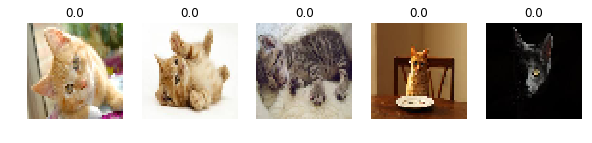

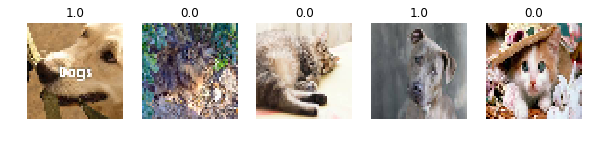

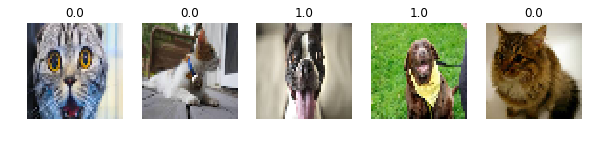

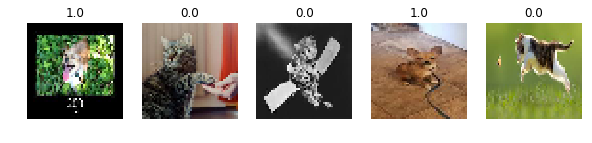

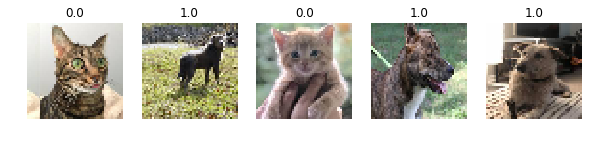

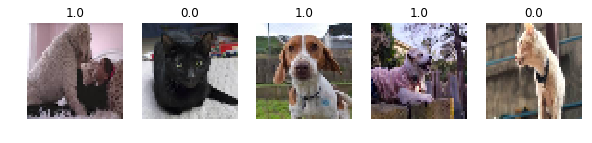

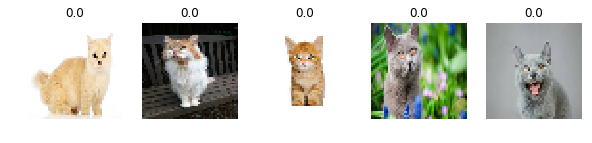

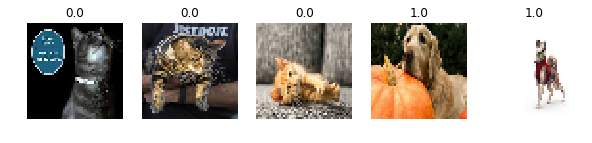

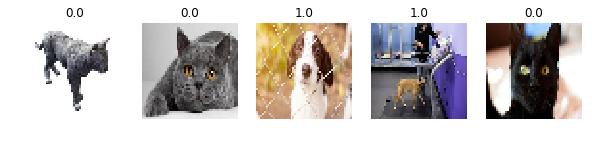

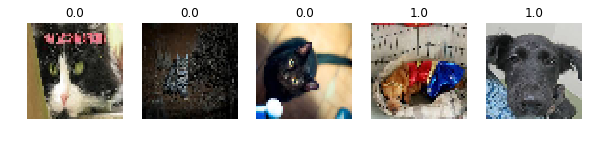

In [9]:
#plots(x_imgs,titles = y_labels)
plots(x_timgs[0:5],titles = y_tlabs[0:5])
plots(x_timgs[5:10],titles = y_tlabs[5:10])
plots(x_timgs[10:15],titles = y_tlabs[10:15])
plots(x_timgs[15:20],titles = y_tlabs[15:20])
plots(x_timgs[20:25],titles = y_tlabs[20:25])
plots(x_timgs[25:30],titles = y_tlabs[25:30])
plots(x_timgs[30:35],titles = y_tlabs[30:35])
plots(x_timgs[35:40],titles = y_tlabs[35:40])
plots(x_timgs[40:45],titles = y_tlabs[40:45])
plots(x_timgs[45:50],titles = y_tlabs[45:50])


# Batch Model
Create a model with the batch test data instead of x,y

In [10]:
model = Sequential()
model.add(c2d(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(c2d(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(m2d(pool_size=4))
model.add(Dense(200, activation="relu", input_shape=(img_rows*img_cols,)))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 12, 12, 200)       6600      
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 57602     
Total params: 84,458
Trainable params: 84,458
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
training_model = model.fit_generator(train_batch, steps_per_epoch=3, validation_data=test_batch, validation_steps =3, epochs=5)

Epoch 1/5
3/3 [==============================] - 13s 4s/step - loss: 6.3235 - acc: 0.5268 - val_loss: 7.4091 - val_acc: 0.5403
Epoch 2/5
3/3 [==============================] - 7s 2s/step - loss: 7.5755 - acc: 0.5300 - val_loss: 7.4091 - val_acc: 0.5403
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 7.9334 - acc: 0.5078 - val_loss: 7.4091 - val_acc: 0.5403
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 6.9308 - acc: 0.5700 - val_loss: 7.4091 - val_acc: 0.5403
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 7.6543 - acc: 0.5251 - val_loss: 7.4091 - val_acc: 0.5403


# X,Y model
This is the model from class, using the images and labels from the test batches

In [11]:
model1 = Sequential()
model1.add(c2d(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(img_rows, img_cols,3)))
model.add(BatchNormalization())
model1.add(m2d(pool_size=2))
#model.add(Dropout(0.3))
model1.add(c2d(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model1.add(m2d(pool_size=2))
#model.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))
# Take a look at the model summary
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total para

In [12]:
layer_input = model1.layers[0]
print(layer_input.get_weights()[0].shape)

(3, 3, 3, 64)


In [13]:
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Broken
This broke when I fixed the labels to be either 1 or 0, instead of a combination.  Reverting the labels back to list.

In [14]:
x_imgs,y_labels = next(train_batch)
x_timgs, y_tlabs = next(test_batch)

In [14]:
batch_size_value = 128
learning_rate = 0.01
epochs_value = 5
training_model = model1.fit(x_imgs,y_labels, 
                           batch_size=batch_size_value, 
                           epochs=epochs_value,
                           validation_data=(x_timgs, y_tlabs))



Train on 100 samples, validate on 50 samples
Epoch 1/5
100/100 [==============================] - 1s 15ms/step - loss: 7.3880 - acc: 0.5400 - val_loss: 9.3485 - val_acc: 0.4200
Epoch 2/5
100/100 [==============================] - 1s 7ms/step - loss: 8.7038 - acc: 0.4600 - val_loss: 9.3485 - val_acc: 0.4200
Epoch 3/5
100/100 [==============================] - 1s 7ms/step - loss: 8.7038 - acc: 0.4600 - val_loss: 9.3485 - val_acc: 0.4200
Epoch 4/5
100/100 [==============================] - 1s 7ms/step - loss: 8.7038 - acc: 0.4600 - val_loss: 9.3485 - val_acc: 0.4200
Epoch 5/5
100/100 [==============================] - 1s 7ms/step - loss: 8.7038 - acc: 0.4600 - val_loss: 9.3485 - val_acc: 0.4200


In [15]:
training_model.history['acc'], training_model.history['val_acc']

([0.47490347536374244,
  0.4399999976158142,
  0.47876448313702025,
  0.44333332777023315,
  0.4749034590242452],
 [0.45967742271961703,
  0.4596774107025516,
  0.4596774236809823,
  0.45967742127756916,
  0.459677416470743])

In [16]:
model1.save('model.keras', overwrite=True)

In [17]:
result = model1.evaluate(x_timgs, y_tlabs)

50/50 [==============================] - 0s 7ms/step


In [18]:
print(result)

[10.960304641723633, 0.3200000023841858]


In [19]:
for name, value in zip(model1.metrics_names, result):
    print (name, value)

loss 10.960304641723633
acc 0.3200000023841858


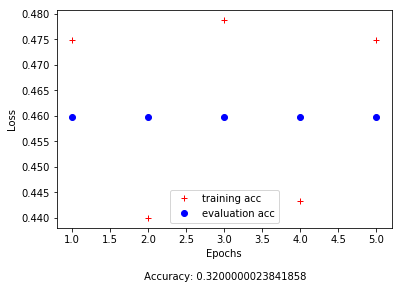

In [22]:
epochs_value = 5
plt.plot(range(1,epochs_value+1), training_model.history['acc'], 'r+', label='training acc')
plt.plot(range(1,epochs_value+1), training_model.history['val_acc'], 'bo', label='evaluation acc')
plt.xlabel('Epochs\n\n Accuracy: '+str(value))
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
y_prediction = np.argmax(model1.predict(x_timgs), axis=1)
actual= np.argmax(y_tlabs, axis=1)
print("How many did we test: " + str(len(actual)))
misclassification=[i for i in range (30) if actual[i]!=y_prediction[i]]
print(" how many were missed: " + str(len(misclassification)))

How many did we test: 50
 how many were missed: 22


In [24]:
print (len(misclassification))
misclassification

22


[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 23,
 24,
 25,
 26,
 28,
 29]

In [25]:
print("actual: ",actual[[0, 3, 4, 6, 7, 8, 9]],"predication: ", y_prediction[[0, 3, 4, 6, 7, 8, 9]])
print(y_prediction)

actual:  [1 1 1 1 1 1 0] predication:  [0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


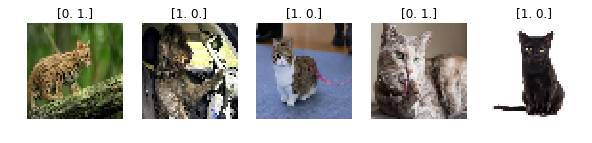

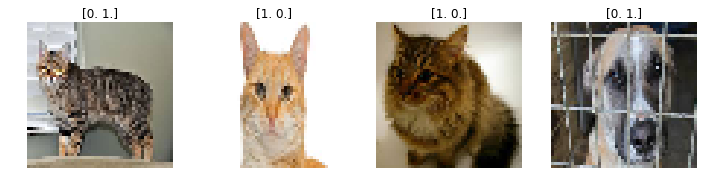

In [26]:
plots(x_timgs[[0, 1, 2, 3, 4]],titles = y_labels[[0, 1, 2, 3, 4]])
plots(x_timgs[[5, 6, 7, 9]],titles = y_labels[[5, 6, 7, 9]])

In [27]:
[0, 2, 3, 4, 6, 8, 10, 12, 14, 15, 19]

[0, 2, 3, 4, 6, 8, 10, 12, 14, 15, 19]

actual:  [1 1 1] predication:  [0 0 0]


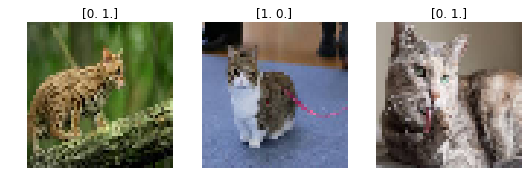

In [28]:
print("actual: ",actual[[0, 2, 3]],"predication: ", y_prediction[[0, 2, 3]])
plots(x_timgs[[0, 2, 3]],titles = y_labels[[0, 2, 3]])

# VGG-16 Model

We will now use the VGG-16 Model and fine tune it to work with our data to train with and predict. After that, we will use the VGG to predict to see if it preforms better. 

In [ ]:
vg = keras.applications.vgg16.VGG16()
vg.summary()

In [ ]:
vg.summary()

In [ ]:
type(vg)

In [ ]:
model = Sequential()
for layer in vg.layers:
    model.add(layer)

model.summary()

In [ ]:
model.layers.pop()
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(2, activation = 'softmax'))
model.summary()

In [13]:
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
training_model = model.fit_generator(train_batch, steps_per_epoch=3, validation_data=test_batch, validation_steps =3, epochs=5)